In [83]:
# %load get_contour.py
import cv2
import numpy as np
from matplotlib import pyplot as plt


if __name__ == "__main__":
    # read the image
    image = cv2.imread('template.png')

    # grayscale
    gray = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)

    # blur the image using Guassian
    blur = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)
    (t, binary) = cv2.threshold(src=blur,
                                thresh=120, maxval=255, type=cv2.THRESH_BINARY)
    
    # Sobel edge detector
    sobel_x = cv2.Sobel(binary, cv2.CV_32F, 1, 0)
    sobel_y = cv2.Sobel(binary, cv2.CV_32F, 0, 1)
    edge_image = cv2.magnitude(sobel_x, sobel_y)
    edge_image = cv2.normalize(
        edge_image, None, 0., 255., cv2.NORM_MINMAX, cv2.CV_8U)

    # thining
    edge_image = cv2.ximgproc.thinning(
        edge_image, None, cv2.ximgproc.THINNING_GUOHALL)

    # get contour
    cv_version = cv2.__version__.split('.')[0]
    if cv_version == '3':
        ret, contours, hierarchy = cv2.findContours(
            image=edge_image, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
    else:
        contours, hierarchy = cv2.findContours(
            image=edge_image, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

    contour_length = []  # array to record contour length
    for contour in contours:
        contour_length.append(len(contour))

    # delete the the longest contour in the corner
    del contours[contour_length.index(max(contour_length))]
    del contour_length[contour_length.index(max(contour_length))]

    # store contour info
    with open('contour.txt', 'w+') as f:
        for contour in contours:
            f.write(str(contour))
    
    valid_contour_list = []

    # draw the contour in image
    for i, contour in enumerate(contours):
        if hierarchy[0, i, 3] == -1:
            cv2.drawContours(image=image, contours=contour,
                             contourIdx=-1, color=(0, 0, 255), thickness=3)
            valid_contour_list.append(np.asarray(contour))
    cv2.imwrite('contour.jpg', image)

    # extract the template contour of number '6'
    valid_template = valid_contour_list[0]
    
    # convert cartesian coordinates into complex values
    contour_in_complex = []
    for pair in valid_template:
        c_number = complex(pair[0][0], pair[0][1])
        contour_in_complex.append(c_number)
    contour_in_complex = np.array(contour_in_complex)
    np.savetxt('contour_complex.txt', contour_in_complex)
    
    # perform discrete fourier transform
    fft_spectrum = np.fft.fft(contour_in_complex)
    np.savetxt('fft_contour.txt', fft_spectrum)
    
    # truncate the spectrum and only retain low frequency componenet
    truncated_fft_spectrum = fft_spectrum[:int(fft_spectrum.size/10)]
    np.savetxt('truncate_fft_contour.txt', truncated_fft_spectrum)
    
    test_image = cv2.imread('a3.pgm')
    
    
    
  


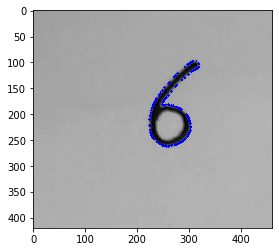

In [78]:
    plt.imshow(image)
    plt.show()

In [6]:
    import numpy as np
    import math
    
    
    array1 = np.array([1+1j, 1+1j, 1+1j, 1+1j, 1+1j])
    array_c2 = np.array([1+2j, 1+2j, 1+2j, 1+2j, 1+2j])
    array_c3 = np.array([2+2j, 2+2j, 2+2j, 2+2j, 2+2j])
    array_c4 = np.array([1+2j, 2+2j, 1+1j, 0.4+5.9j, 6+1j])
    
    arr = array1[np.newaxis]
    arr_conj = np.conj(arr)
    arr_t = np.transpose(arr_conj)
    result = np.absolute(arr.dot(arr_t))
    
    def correlation(arr1, arr2):
        arr = arr1[np.newaxis]
        arr_conj = np.conj(arr)
        arr_t = np.transpose(arr_conj)
        return np.absolute(arr.dot(arr_t))[0][0]
    
    def measure_sim(vec1, vec2):
        return correlation(vec1, vec2) / (math.sqrt(correlation(vec1, vec1)) * math.sqrt(correlation(vec2, vec2)))
    
    print(measure_sim(array1,array_c4))
    
#     print(array_c2.T * array_c2)
    
#     array2 = np.array([3, 3, 3, 3])
#     if array2.size < array1.size:
#         extended_array = np.zeros(array1.shape)
#         extended_array[: array2.shape[0]] = array2
#         print(extended_array)
    
#     print(array1)

#     for element in np.nditer(array1, op_flags=['readwrite']):
#         element[...] = float(abs(element))
    
#     array3 = np.absolute(array1)
#     print(array3)
        
    
#     result = (np.square(array1 - array2)).mean()
#     result

0.3390902206824119


In [14]:
import numpy as np

a = np.array([[[1, 1]], [[2, 2]], [[3, 3]]])
b = np.array([[4, 4]])
c = np.append(a,b, axis=1)
print(c.shape)


ValueError: all the input arrays must have same number of dimensions